In [23]:
### Packages ###
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

## Standard Brownian Motion (Wiener Process)
### 定義
$(W_t)_{t \geq 0}$ on $(\Omega, \mathcal{F}, \mathbb{P})$ is a SBM if

1. $t \mapsto W_t$ is continuous, 
2. $(W_{t_j} - W_{t_{j - 1}})_{j = 1}^n$ are independent random variables for any $0 = t_0 < t_1 < \ldots < t_n < \infty$, 
3. $W_t - W_s \sim N(0, t - s)$ $(0 \leq s < t)$, and
4. $W_0 = 0$.

### 離散近似
区間$[0, T]$におけるブラウン運動$W_t$のサンプルパスをシミュレーションする．時間区間$[0, T]$を$n$等分し，時刻
$$
t_0 = 0, t_1 = h, t_2 = 2h, \ldots, t_n = T
$$
を考える．ただし，$h = T/n$である．

定義の2., 3. より，各$i = 1, 2, \ldots, n$に対して$W_{t_i} - W_{t_{i - 1}}$は独立で，$N(0, h)$に従う．よって，ブラウン運動の離散近似を得るには，$W_0 = 0$から開始し，1ステップごとに$N(0, h)$に従う乱数を加えればよい．

#### Algorithm
- $W_0 \leftarrow 0$
- For $i = 1$ to $n$ do
    - Generate $r_i \sim N(0, 1)$
    - $W_{t_i} \leftarrow W_{t_{i - 1}} + \sqrt{h} r_i$
- EndFor

このアルゴリズムによる離散近似を以下で実装した．

In [7]:
### Discrete approximation ###
def Discrete_SBM(maxtime, time_set):
    h = time_set[1] - time_set[0]
    W_0 = 0                                     # Init value
    Wiener_processes = [W_0]
    for t in range(1, len(time_set)):
        r_t = np.random.randn()                 # r_t ~ N(0, 1)
        # W_t - W_s ~ N(0, t - s)
        W_t = Wiener_processes[t - 1] + np.sqrt(h) * r_t
        Wiener_processes.append(W_t)
    Wiener_processes = np.array(Wiener_processes)
    return Wiener_processes


In [8]:
### time set ###
maxtime = 100
time_set = np.linspace(0, maxtime, num = maxtime * 100 + 1)

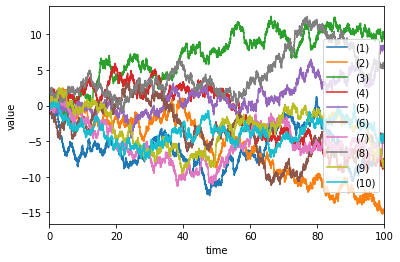

In [14]:
### color cycle (matplotlib) ###
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
### Sample path ###
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([0, maxtime])
ax.set_xlabel("time")
ax.set_ylabel("value")
for i in range(len(color_cycle)):
    Wiener_processes = Discrete_SBM(maxtime, time_set)
    ax.plot(time_set, Wiener_processes, color = color_cycle[i], label = "(" + str(i + 1) + ")")
ax.legend(loc = 'best')
plt.show()


## Bessel process
$W := (W_t)_{t \geq 0}$: $n$ dim $\mathcal{F}_t$-SBM on $(\Omega, \mathcal{F}, \mathbb{P}, (\mathcal{F}_t)_{t \geq 0})$.
このとき，
$$
S_t := |W_t|^2 = \sum_{j = 1}^n (W_t^j)^2 \; \; (t \geq 0)
$$
を$n$次元2乗ベッセル過程と呼ぶ．

In [20]:
n = 2
Wiener_processes_vec = []
for i in range(n):
    Wiener_processes_vec.append(Discrete_SBM(maxtime, time_set))
Wiener_processes_vec = np.array(Wiener_processes_vec)


In [22]:
Bessel_processes = []
for t in range(len(time_set)):
    S_t = 0
    for j in range(n):
        S_t += Wiener_processes_vec[j][t]**2
    Bessel_processes.append(S_t)
Bessel_processes = np.array(Bessel_processes)

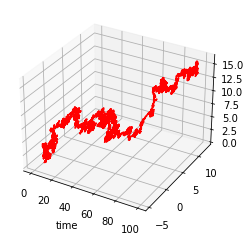

In [26]:
# 3d-plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel("time")
ax.plot(time_set, Wiener_processes_vec[0], Wiener_processes_vec[1], c = 'r')
plt.show()

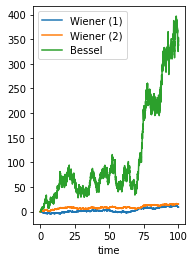

In [28]:
# Wiener process and Bessel process
fig = plt.figure()
ax = fig.add_subplot(121)
ax.set_xlabel("time")
for i in range(n):
    ax.plot(time_set, Wiener_processes_vec[i], color = color_cycle[i], label = "Wiener (" + str(i + 1) + ")")
ax.plot(time_set, Bessel_processes, color = color_cycle[n], label = "Bessel")
ax.legend(loc = 'best')
plt.show()